CV method:StratifiedKFlod  Split number:  5
Start:   current:  1    Total:  5
No. 1 epoch
No. 2 epoch
No. 3 epoch
No. 4 epoch
No. 5 epoch
No. 6 epoch
No. 7 epoch
No. 8 epoch
No. 9 epoch
No. 10 epoch
fit done
Time: 18.9274


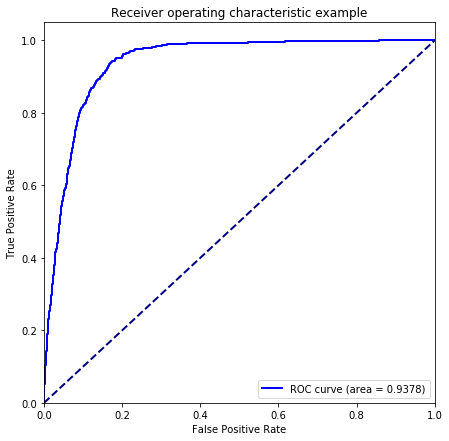

Start:   current:  2    Total:  5
No. 1 epoch
No. 2 epoch
No. 3 epoch
No. 4 epoch
No. 5 epoch
No. 6 epoch
No. 7 epoch
No. 8 epoch
No. 9 epoch
No. 10 epoch
fit done
Time: 16.9627


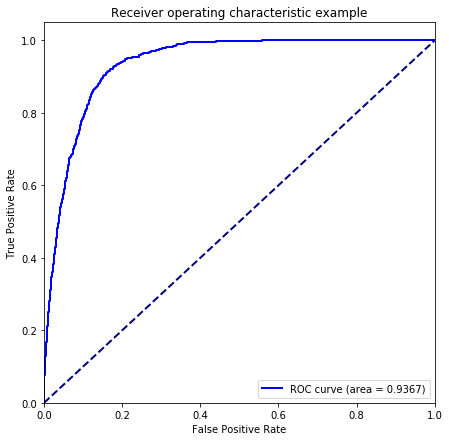

Start:   current:  3    Total:  5
No. 1 epoch
No. 2 epoch
No. 3 epoch
No. 4 epoch
No. 5 epoch
No. 6 epoch
No. 7 epoch
No. 8 epoch
No. 9 epoch
No. 10 epoch
fit done
Time: 14.9036


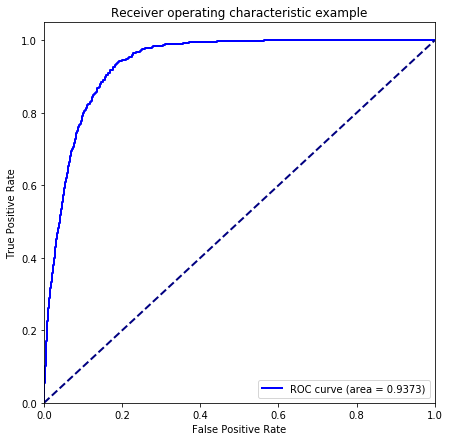

Start:   current:  4    Total:  5
No. 1 epoch
No. 2 epoch
No. 3 epoch
No. 4 epoch
No. 5 epoch
No. 6 epoch
No. 7 epoch
No. 8 epoch
No. 9 epoch
No. 10 epoch
fit done
Time: 17.7687


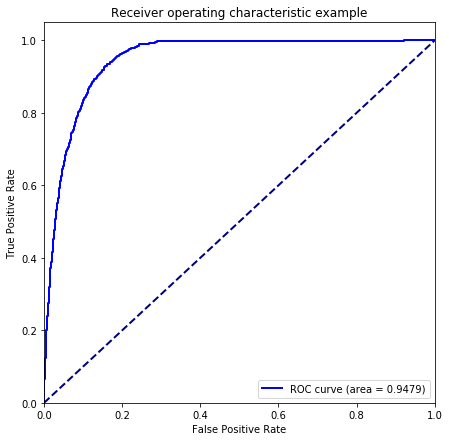

Start:   current:  5    Total:  5
No. 1 epoch
No. 2 epoch
No. 3 epoch
No. 4 epoch
No. 5 epoch
No. 6 epoch
No. 7 epoch
No. 8 epoch
No. 9 epoch
No. 10 epoch
fit done
Time: 16.0783


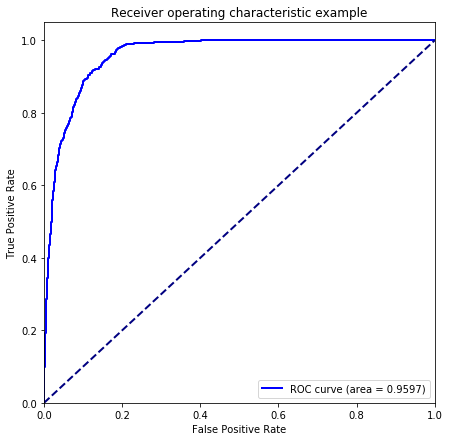

Mean Accuracy of Train Set:  nan 
  Mean Accuracy of the Test Set: nan 
  Mean AUC of the Train Set: 0.977 
  Mean AUC of the Test Set: 0.9439


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:131: RuntimeWarning: Mean of empty slice.
C:\Users\Chen\AppData\Roaming\Python\Python36\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:132: RuntimeWarning: Mean of empty slice.


In [4]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
#生成ROC曲线和AUC值
def paintROC(y_test1,y_pred1):
    fpr,tpr,threshold = roc_curve(y_test1, y_pred1) ###计算真正率和假正率
    roc_auc = auc(fpr,tpr) ###计算auc的值

    plt.figure()
    lw = 2
    plt.figure(figsize=(7,7))
    plt.plot(fpr, tpr, color='blue',
            lw=lw, label='ROC curve (area = %0.4f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

import pandas as pd
import numpy as np
import os
import xlrd

data=pd.read_csv(r'E:\Data_test\2019-PyBD-FinalTask\Train.csv')

#丢弃缺失值行
data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True) 
x=data

#数值型变量
age=np.array(x['age'])
duration=np.array(x['duration'])
campaign=np.array(x['campaign'])
pdays=np.array(x['pdays'])
previous=np.array(x['previous'])
empr=np.array(x['emp-var-rate'])
cons_price=np.array(x['cons-price-idx'])
cons_idx=np.array(x['cons-conf-idx'])
euribor3m=np.array(x['euribor3m'])
employ=np.array(x['nr-employed'])

#分类型变量
job=np.array(pd.get_dummies(x['job']),dtype=np.float64)
marital=np.array(pd.get_dummies(x['marital']),dtype=np.float64)
education=np.array(pd.get_dummies(x['education']),dtype=np.float64)
default=np.array(pd.get_dummies(x['default']),dtype=np.float64)
housing=np.array(pd.get_dummies(x['housing']),dtype=np.float64)
loan=np.array(pd.get_dummies(x['loan']),dtype=np.float64)
contact=np.array(pd.get_dummies(x['contact']),dtype=np.float64)
month=np.array(pd.get_dummies(x['month']),dtype=np.float64)
day_of_week=np.array(pd.get_dummies(x['day_of_week']),dtype=np.float64)
poutcome=np.array(pd.get_dummies(x['poutcome']),dtype=np.float64)

x_initial=np.c_[age,duration,campaign,pdays,previous,empr,cons_price,cons_idx,euribor3m,
               employ,job,marital,education,default,housing,loan,contact,month,day_of_week
               ,poutcome]

y=np.array(x['y'])

from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_initial = Imputer().fit_transform(x_initial)
X=scaler.fit_transform(x_initial)

# train the neural network

# epochs is the number of times the training data set is used for training
     
from sklearn.model_selection import StratifiedKFold  
import time
import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve,auc

cv_number=5# parameter

skf= StratifiedKFold(n_splits=cv_number) # x-fold cv 
skf.get_n_splits(X,y) 
print("CV method:StratifiedKFlod  Split number: ",cv_number) #5折交叉检验

ac_test=[]
ac_train=[]
ac_test_auc=[]
ac_train_auc=[]
term=1

for train_index, test_index in skf.split(X, y):  
    print("Start:   current: ",term,"  ","Total: ",cv_number) 
    time_start=time.time()
    X_train,X_test = X[train_index], X[test_index]  
    y_train,y_test = y[train_index], y[test_index] 
    #train model on different training base
    time_start=time.time()
    
    epochs = 10

    for e in range(epochs):
        print("No.",e+1,"epoch")
        for i in range(len(X_train)):
            n.fit(X_train[i],y_train[i])

    print("fit done")
    y_pred_test=[]
    y_pred_train=[]
    
    for i in range(len(X_test)):
        y_pred_test.append(n.predict(X_test[i])[0])
    for i in range(len(X_train)):
        y_pred_train.append(n.predict(X_train[i])[0])    
    
  #  print(y_pred_test)
  #  ac_test.append(metrics.accuracy_score(y_test.astype('int'), y_pred_test.astype('int')))
  #  ac_train.append(metrics.accuracy_score(y_train.astype('int'),y_pred_train.astype('int')))
    ac_test_auc.append(sklearn.metrics.roc_auc_score(y_test, y_pred_test))
    ac_train_auc.append(sklearn.metrics.roc_auc_score(y_train,y_pred_train))
    
    time_end=time.time()
    print("Time:",round(time_end-time_start,4))
    term+=1
    paintROC(y_test,y_pred_test)
    
ac_test_auc=np.array(ac_test_auc)
ac_train_auc=np.array(ac_train_auc)
ac_test=np.array(ac_test)
ac_train=np.array(ac_train)
print("Mean Accuracy of Train Set: ",round(ac_train.mean(),4),"\n",
     " Mean Accuracy of the Test Set:",round(ac_test.mean(),4),"\n",
      " Mean AUC of the Train Set:",round(ac_train_auc.mean(),4),"\n",
      " Mean AUC of the Test Set:",round(ac_test_auc.mean(),4)
     ) 
